### ANÁLISIS DE DATOS CON PANDAS

**Dataframe ?** Es un estructura de datos ampliamente usada. Un data frame tiene dos dimensiones de Arrays. Un dataframe tambien tiene dos tipos de indices, column-index y row-index.

Es muy común crear los DataFrames con diccionarios.

In [1]:
import pandas as pd

#### Lectura de datos sobre el ejemplo de registro y guardado en archivo tipo json 

In [27]:
## Read in the data json file
file_path = './files/students.json'
data = pd.read_json(file_path)
data.head()

,id,nombre,Apellido,edad,carrera
0,1,Juan,Fernandez,10,educacion
1,2,Gabriela,Zambrano,18,contaduria
2,3,Andres,Ponnefz,17,biologia
3,4,Jesus,Portillo,15,biologia
4,5,Carlos,Centeno,28,ing de sistemas


### Filtros y mascaras en pandas

In [31]:
mascaras = data['edad'] >= 18
mayores_edad = data[data['edad'] >= 18]
mayores_edad.head()

,id,nombre,Apellido,edad,carrera
1,2,Gabriela,Zambrano,18,contaduria
4,5,Carlos,Centeno,28,ing de sistemas
5,6,Joshua,Rodriguez,38,biologia


---


#### Leamos un archivo con pandas tipo CSV

students file .csv

In [21]:
file_student = './files/exams.csv'
student_data = pd.read_csv(file_student)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


---

In [22]:
#simular valores nulos
# para simular vamos a agregar una nueva columna con valores nulos

student_data["Age"] = None

In [23]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Age
0,male,group A,high school,standard,completed,67,67,63,None
1,female,group D,some high school,free/reduced,none,40,59,55,None
2,male,group E,some college,free/reduced,none,59,60,50,None
3,male,group B,high school,standard,none,77,78,68,None
4,male,group E,associate's degree,standard,completed,78,73,68,None


In [29]:
## Que columnas tengo sobre mi datraFrame

print(f"total columnas {len(student_data.columns)} nombres de columnas {list(student_data.columns)}")

# Identificar las columnas con las que voy a trabajar ()
print("\n *************** \n")
## Identificar los valores nulos
print(f"Valores null totales:\n{student_data.isnull().sum()}\n")

## Tamano del DataFrame

print(f"Tamano del DataFrame:\n{student_data.shape}\n")

## Describir el DataFrame
print(f"Descripcion del DataFrame:\n{student_data.describe()}\n")

# Identificar tipos de datos

print(f"Tipos de datos:\n{student_data.dtypes}")

total columnas 9 nombres de columnas ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'Age']

 *************** 

Valores null totales:
gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
Age                            1000
dtype: int64

Tamano del DataFrame:
(1000, 9)

Descripcion del DataFrame:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.00

In [35]:
import random

student_data["math score"].max()



lista_edades = [str(random.randint(0,99)) for _ in range(0,len(student_data))]
# Slicing en listas
print(lista_edades[:5])

student_data["Age"] = lista_edades


['60', '98', '55', '27', '31']


In [38]:
### Verificar las edades 

student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Age                            object
dtype: object

In [40]:
### Cambiar el tipo de dato de la columna Age a un valor numerico 
student_data["Age"] = student_data["Age"].astype(int)

#student_data["Age"] = pd.to_numeric(student_data["Age"], errors='coerce')
student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Age                             int64
dtype: object

In [55]:
## 
new_student_data = student_data[["Age", "math score", "reading score", "writing score"]]
new_student_data.head()

### Identificar los estudiantes mayores de edad y los menores de edad

mask = new_student_data["Age"] >= 18
#print(f"Estudiantes mayores de edad:\n{mask}\ntipo de dato: {type(mask)}")
mask_menores_edad = new_student_data["Age"] < 18    

mayores_edad = new_student_data[mask]
menores_edad = new_student_data[~mask] #new_student_data[mask_menores_edad]
mayores_edad.head()

,Age,math score,reading score,writing score
0,60,67,67,63
1,98,40,59,55
2,55,59,60,50
3,27,77,78,68
4,31,78,73,68


In [54]:
len(mayores_edad), len(new_student_data), len(menores_edad)

(827, 1000, 173)

---

Usuarios bancos,

Que pasa si nuestros datos vienen en formato CSV pero separados por otros caracteres diferentes a la ,

In [57]:
bank_data = pd.read_csv('./files/bank.csv', sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [80]:
mascara = bank_data['education'] == "primary"

bank_data["boolean_data_education"] = mascara

primary_education_data = bank_data[mascara]

primary_education_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,True
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no,True
26,55,blue-collar,married,primary,no,627,yes,no,unknown,5,may,247,1,-1,0,unknown,no,True
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,True


In [81]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,False
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,False
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,False
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,False


In [82]:
primary_education_data.dtypes

age                        int64
job                       object
marital                   object
education                 object
default                   object
balance                    int64
housing                   object
loan                      object
contact                   object
day                        int64
month                     object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
y                         object
boolean_data_education      bool
dtype: object

In [83]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Revisar columnas

In [84]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'boolean_data_education'],
      dtype='object')

In [ ]:
mascara = bank_data['month'] == "oct"
data_per_month = bank_data[mascara]
#data_per_month.head()

describe_data = data_per_month.describe()

data_per_month['mes'] = "octubre"

data_per_month.head()


#loc permite seleccionar filas y columnas por etiquetas o condición
#iloc permite seleccionar filas y columnas por índices

C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_41040\2162029590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_month['mes'] = "octubre"


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education,mes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True,octubre
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,True,octubre
61,63,retired,married,secondary,no,415,yes,no,cellular,7,oct,323,1,-1,0,unknown,no,False,octubre
64,56,admin.,married,secondary,no,16873,no,no,cellular,7,oct,223,1,-1,0,unknown,no,False,octubre
97,30,admin.,single,tertiary,no,261,no,no,cellular,19,oct,233,1,137,20,failure,no,False,octubre


In [60]:
bank_data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [64]:
# escoger 4 columnas y guardarlas en un nuevo dataframe

new_bank_data = bank_data[['age', 'job', 'marital', 'education']]
new_bank_data.to_csv('./files/new_bank_data.csv', sep=',')

In [ ]:
#bank_data["age"]=bank_data['age'].astype('str')
#
#bank_data.dtypes

age                       object
job                       object
marital                   object
education                 object
default                   object
balance                    int64
housing                   object
loan                      object
contact                   object
day                        int64
month                     object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
y                         object
boolean_data_education      bool
dtype: object

In [62]:
primary_education_data.to_csv('./files/primary_education_data.csv', index=False, sep=',')

In [67]:
type(primary_education_data["job"])

pandas.core.series.Series

In [55]:
#import csv
#
#with open('./files/bank.csv', 'r') as f:
#    reader = csv.reader(f)
#    for row in reader:
#        print(row[0])

In [ ]:
## save with pandas to csv
bank_data.to_csv('./files/bank_pandas.csv')

In [33]:
len(student_data)

1000

In [4]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Data operation

Cualquier columna o fila del DataFrame puede ser seleccionada pasandole el nombre de las columnas y filas. Despues de seleccionar una desde el DataFrame, esta columna/fila seleccionada es uni-dimensional y es considerada como una serie.

In [6]:
ethnicity = student_data["race/ethnicity"]

print(f"type data {type(ethnicity)}")

ethnicity.head()

type data <class 'pandas.core.series.Series'>


0    group A
1    group D
2    group E
3    group B
4    group E
Name: race/ethnicity, dtype: object

### Filter data

Los datos pueden ser filtrados 

In [119]:
### only ethnicity group D

group_D_ethnicity = student_data[student_data["race/ethnicity"] == "group D"]

group_D_ethnicity.head()

KeyError: 'race/ethnicity'

### Null values



In [93]:
student_data["gender"][0] = None

C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_41040\2397718550.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  student_data["gender"][0] = None
C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_41040\2397718550.py:1

In [94]:
student_data.isnull().sum()

gender                         1
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [96]:
student_data.head()
print(f"student_data shape {student_data.shape}")

student_data shape (1000, 7)


In [97]:
student_data["gender"].unique()

array([None, 'female', 'male'], dtype=object)

In [12]:
## graph the data
student_data['gender'].isnull().head()


0    False
1    False
2    False
3    False
4    False
Name: gender, dtype: bool

----

### Count values

Pandas con el metodo *value_counts()* muestra el total de ocurrencias de los eventos (datos)

In [66]:
list(student_data.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Age']

In [67]:
student_data['race/ethnicity'].value_counts().head()

race/ethnicity
group C    323
group D    262
group B    205
group E    131
group A     79
Name: count, dtype: int64

In [98]:
student_data['gender'].value_counts().head()

gender
male      516
female    483
Name: count, dtype: int64

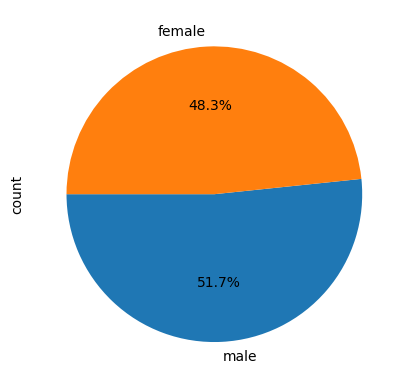

In [ ]:
plt_data_student =student_data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)

plt_data_student.get_figure().savefig("img.png")



In [70]:
student_data['race/ethnicity'].unique(), len(student_data)

(array(['group A', 'group D', 'group E', 'group B', 'group C'],
       dtype=object),
 1000)

<Axes: ylabel='race/ethnicity'>

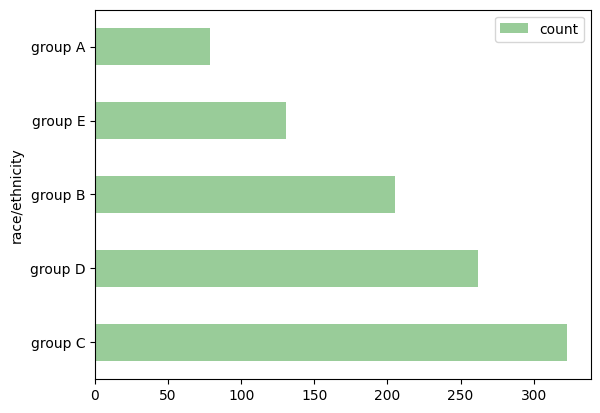

In [73]:
student_data['race/ethnicity'].value_counts().plot(kind='barh', color='green', alpha=0.4, legend=True)

### Group by with columns - names

<Axes: ylabel='count'>

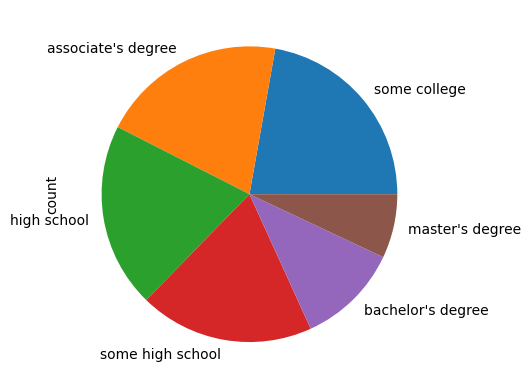

In [16]:
student_data['parental level of education'].value_counts().plot(kind='pie')

<Axes: xlabel='race/ethnicity'>

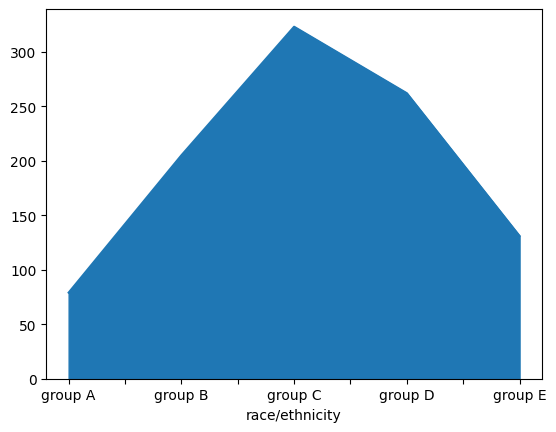

In [21]:
sg = student_data.groupby(['race/ethnicity']).size()
sg.plot(kind='area')

In [74]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<Axes: ylabel='count'>

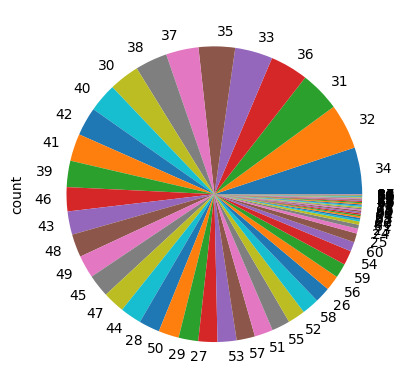

In [78]:
### Tipo grafica balance

bank_data['age'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

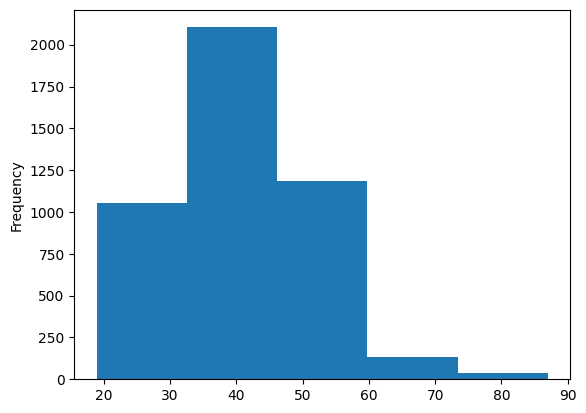

In [ ]:
bank_data['age'].plot(kind='hist', bins=5)